# KMeans Clustering

***
### `class KMeans(clusterCount: 2, maximumIterationCount: 300, initializer: "kmean++", seed: 0)`
***

## Parameters:
  #### `clusterCount`: *Int, optional, default `2`*
  The number of clusters to form as well as the number of centroids to generate.
  #### `maximumIterationCount`: *Int, optional, default `300`*
  Maximum number of iterations of the k-means algorithm for a single run.
  #### `initializer`: *{`"kmeans++"` or `"random"`}, optional, default `"kmeans++"`*
  Method for cluster initialization.
  `"kmeans++"`: Heuristic Initialization of centroids. 
  `"random"`: Random Initialization of centroids.  
  #### `seed`: *Int64, optional, default `0`*
  Initialize a pseudo-random number generator for `"kmeans++"`.
  

## Attributes: 
  #### `centroids`: *Tensor, shape [centroid count, feature count]*
  Coordinates of cluster centers.
  #### `labels`: *Tensor, shape [sample count]*
  Labels of each point.
  #### `inertia`: *Tensor*
  Inertia is the sum of square distances of samples to their closest cluster center.

***

## Methods

***

  ### `fit(data: Tensor)`:  Fit a KMeans cluster.

  ### Parameters:

  #### `data`: *Tensor, shape [sample count, feature count]*
  Training data.

  ***

  ### `prediction(for: Tensor)`: Predict the closest cluster given sample belongs.

  ### Parameters:
  #### `for`: *Tensor, shape [sample count, feature count]*
  Sample data.

  ### Returns:
  Returns predicted closest cluster given sample.  

  ***
  ### `score()`: Returns the sum of square distances of samples to their closest cluster center.

  ### Returns:
  Sum of square distances of samples to their closest cluster center.


  ***

  ### `transformation(for: Tensor)`: Transform input to a cluster-distance space.

  ### Parameters:
  #### `for`: *Tensor, shape [sample count, feature count]*
  New data to transform.

  ### Returns:
  Returns input transformed in the new space.

  ***

  ### `fitAndPrediction(for: Tensor)`: 	Compute cluster centers and predict the closest cluster given sample belongs.

  ### Parameters:
  #### `for`: *Tensor, shape [sample count, feature count]*
  Sample data.

  ### Returns:
  Returns predicted closest cluster given sample.  

  ***

  ### `fitAndTransformation(for: Tensor)`: 	Compute cluster centers and transform input to a cluster-distance space.

  ### Parameters:
  #### `for`: *Tensor, shape [sample count, feature count]*
  New data to transform.

  ### Returns:
  Returns input transformed in the new space.
  
***

# Example

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1IXBztJeB-VyqLFm4nyNrJH8vHi8LIXuX"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/param087/swiftML/blob/master/Notebooks/KMeans%20Clustering.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

## Install the swiftML package from GitHub.

In [1]:
%install '.package(url: "https://github.com/param087/swiftML", from: "0.0.2")' swiftML

Installing packages:
	.package(url: "https://github.com/param087/swiftML", from: "0.0.2")
		swiftML
With SwiftPM flags: []
Working in: /tmp/tmp_l3quisk/swift-install
Fetching https://github.com/param087/swiftML
Completed resolution in 2.93s
Cloning https://github.com/param087/swiftML
Resolving https://github.com/param087/swiftML at 0.0.2
Compile Swift Module 'swiftML' (16 sources)
/tmp/tmp_l3quisk/swift-install/package/.build/checkouts/swiftML-1801b701/Sources/swiftML/KNeighborsClassifier.swift:106:13: warning: variable 'indices' was written to, but never read
        var indices: Tensor<Int32>
            ^

/tmp/tmp_l3quisk/swift-install/package/.build/checkouts/swiftML-1801b701/Sources/swiftML/PCA.swift:158:13: warning: variable 'u' was written to, but never read
        var u: Tensor<Double>
            ^
/tmp/tmp_l3quisk/swift-install/package/.build/checkouts/swiftML-1801b701/Sources/swiftML/RandomForest.swift:54:13: warning: variable 'outOfBootData' was written to, but never read

## Import Swift packages

In [2]:
import TensorFlow
import swiftML

## Import Python modules

In [3]:
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

let np = Python.import("numpy")

let plt = Python.import("matplotlib.pyplot")

## Dataset

In [4]:
let dataset = Tensor<Float>([[1, 1], [1, 2], [2, 2], [4, 5], [5, 4]])

## KMeans with `random` initializer

In [5]:
let model = KMeans(clusterCount: 2, maximumIterationCount: 100, initializer: "random")
model.fit(data: dataset)
print("Labels: ",model.labels)
print("Inertia: ",model.inertia)
print("Transformation: ",model.transformation(for: dataset))

Labels:  [[0],
 [0],
 [0],
 [1],
 [1]]
Inertia:  2.3333335
Transformation:  [[ 0.7453561,  4.9497476],
 [ 0.4714045,  4.3011627],
 [ 0.7453559,   3.535534],
 [  4.268749, 0.70710677],
 [ 4.3461347, 0.70710677]]


In [6]:
model.centroids

[[1.3333334, 1.6666667],
 [      4.5,       4.5]]


In [7]:
let testdata = Tensor<Float>([[3,4], [2,3], [5, 5]])
model.prediction(for: testdata)

[[1],
 [0],
 [1]]


In [8]:
let y = model.labels.makeNumpyArray()
let centroids = model.centroids.makeNumpyArray()

let dataNP = dataset.makeNumpyArray()
let colors2 = ["red","blue"]

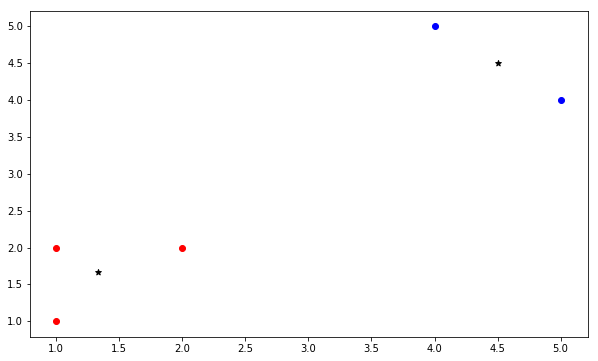

None


In [9]:
plt.figure(figsize: [10, 6])

for i in 0..<dataset.shape[0] {
    let id:Int = Int(y[i][0])!
    plt.scatter(dataNP[i][0], dataNP[i][1], color: colors2[id])
}

for i in 0..<model.centroids.shape[0] {
    plt.scatter(centroids[i][0], centroids[i][1], color: "black", marker: "*")
}

plt.show()

## Kmeans with `kmeans++` initializer

In [10]:
let model = KMeans(clusterCount: 2, maximumIterationCount: 100, initializer: "kmeans++")
model.fit(data: dataset)
print("Labels: ",model.labels)
print("Inertia: ",model.inertia)
print("Transformation: ",model.transformation(for: dataset))

Labels:  [[0],
 [0],
 [0],
 [1],
 [1]]
Inertia:  2.3333335
Transformation:  [[ 0.7453561,  4.9497476],
 [ 0.4714045,  4.3011627],
 [ 0.7453559,   3.535534],
 [  4.268749, 0.70710677],
 [ 4.3461347, 0.70710677]]


In [11]:
let testdata = Tensor<Float>([[3,4], [2,3], [5, 5]])
model.prediction(for: testdata)

[[1],
 [0],
 [1]]


In [12]:
let y = model.labels.makeNumpyArray()
let centroids = model.centroids.makeNumpyArray()

let dataNP = dataset.makeNumpyArray()
let colors2 = ["red","blue"]

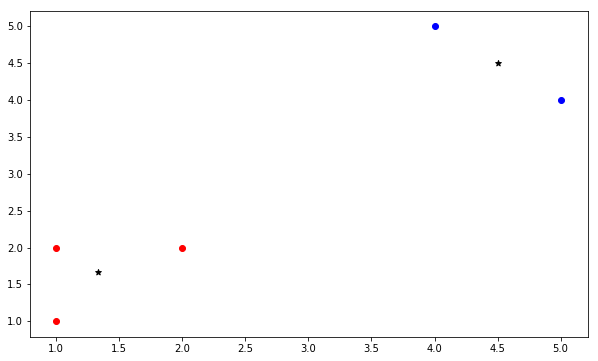

None


In [13]:
plt.figure(figsize: [10, 6])

for i in 0..<dataset.shape[0] {
    let id:Int = Int(y[i][0])!
    plt.scatter(dataNP[i][0], dataNP[i][1], color: colors2[id])
}

for i in 0..<model.centroids.shape[0] {
    plt.scatter(centroids[i][0], centroids[i][1], color: "black", marker: "*")
}

plt.show()